In [1]:
import numpy as np
import field_velocity
import matplotlib.pyplot as plt

In [2]:
a = 1


max_mode = 1
B = np.zeros((max_mode+1, max_mode+1))
B_tilde = np.zeros_like(B)
C = np.zeros_like(B)
C_tilde = np.zeros_like(B)
B[0, 1] = 1
#B_tilde[1, 1] = 1

max_length = 2
z = np.linspace(-max_length, max_length, 100)
y = np.linspace(-max_length, max_length, 100)
Z, Y = np.meshgrid(z, y)
R = np.sqrt(Z**2 + Y**2)
Theta = np.arctan(Y/Z)
Phi = np.ones_like(Theta) * np.pi/2

mode_array = np.array([B, B_tilde, C, C_tilde])


In [3]:
u_y_list = []
u_z_list = []
for i in range(100):
    for j in range(100):
        _,u_y, u_z = field_velocity.field_cartesian(max_mode, R[i,j], Theta[i,j], np.pi/2, a,mode_array )
        u_y_list.append(u_y)
        u_z_list.append(u_z)
np.shape(u_y_list)

u_y = np.array(u_y_list )
u_z = np.array(u_z_list)
u_y

array([-0.04419417, -0.04554431, -0.04691473, ..., -0.04691473,
       -0.04554431, -0.04419417])

In [4]:
R = R.flatten()

u_y[np.where(R<a)]=0
u_z[np.where(R<a)]=0

u_y = u_y.reshape(100, 100)
u_z = u_z.reshape(100, 100)

In [5]:
u_z.shape

(100, 100)

Text(0.5, 1.0, 'Mode ')

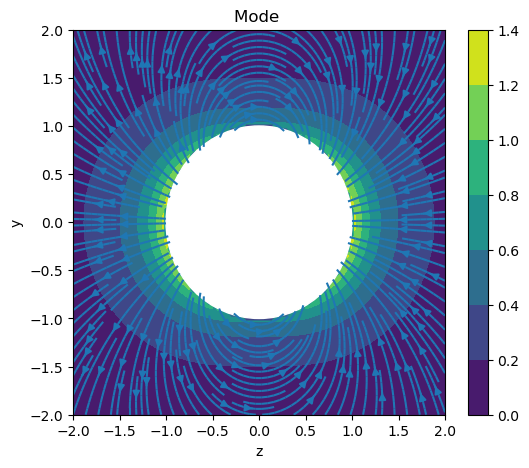

In [6]:

fig, ax = plt.subplots(figsize=(6, 5))
ax.set_xlim([-max_length, max_length])
ax.set_ylim([-max_length, max_length])

K = 3*a**3/4

skip = (slice(None, None, 2), slice(None, None, 3))
#plt.quiver(Z[skip], Y[skip], u_z[skip], u_y[skip])
#ax.streamplot(Z, Y, u_z, u_y, density = 2)
ax.streamplot(Z, Y, u_z, u_y, density = 2)
cp = ax.contourf(Z, Y, np.sqrt(u_z**2 + u_y**2))

circle1 = plt.Circle((0, 0), 1, color='white')
fig.colorbar(cp)
ax.add_patch(circle1)

plt.xlabel("z")
plt.ylabel("y")
plt.title("Mode ")